
# Generative Adversarial Networks

## DCGAN : Deep Convolutional Generative Adversarial Networks

Scaling up Generative Adversarial Networks using Convolutional Neural Networks has always been quite difficult. Additionally, training of GANs is always difficult are require often several tips and tricks to obtain a desirable performance. 

The DCGAN is a specialised architecture that functions better by using some significant **architectural modifications** in implementing CNNs as compared to a normal CNN used in a supervised learning scenario [2]. Some of those modifications are as follows:

- *Using an 'All-Convolutional Net' architecture:* Typically, CNNs are constructed using Max-pool operations. However, in DCGANs this is replaced with the use of strided and fractionally strided convolutions. This is done so that the network can learn its own spatial downsampling or upsampling.

- *Eliminating fully connected layers at the top:* Does not use fully connected layers a the top of the convolutional features. Instead considers the reshaping of the latent data $\mathbf{z}$ at the start of the generator network to reshaped into 4-dim tensor, and using a *flattening* operation at the end of the discriminator network.

- *Using Batch-Normalization:* This normalizes the input to each unit to have zero mean and unit variance. This helps to deal with training problems. However, directly applying batch normalization to all layers results in sample oscillation and model instability. It shouldn't be applied on the generator output layer and on the discriminator input layer. 

- *Using LeakyReLU as an activation fn.:* Typically ReLU activations are used in generator function, but using a 'Leaky' version (allowing some slope in the rectified region) proves to be better for higher resolution model. 

## Training of DCGANs

The training will consist of simulatnaeous minibatch gradient descent using Adam for the Discriminator and Generator networks 

The training statistics that will be reported are as follows:

**Loss_D** : The Discriminator loss that is computed over all real and all fake batches of data as:

$\left(log\left(D\left(\mathbf{x}\right)\right) + log\left(1 - D\left(G\left(\mathbf{z}\right)\right)\right)\right)$

However, for improved training it has been shown by Goodfellow et.al. that minimizing the Generator function using $log\left(1 - D\left(G\left(\mathbf{z}\right)\right)\right)$ is not efficient in the initial stage, as early in the learning phase $D\left(G\left(\mathbf{z}\right)\right)$ is usually close to 0 (since the generator is able to generate samples that look very far from the real), so the loss $log\left(1 - D\left(G\left(\mathbf{z}\right)\right)\right)$ is close to zero, which means very less updates for the parameters of the $G\left(\mathbf{z}\right)$ through backprop. 

Instead the function to be optimized could be:

$\left(log\left(D\left(\mathbf{x}\right)\right) + log\left(D\left(G\left(\mathbf{z}\right)\right)\right)\right)$

**(which sadly is no longer a zero-sum game, but helps train the network better)** (for information on why this called a zero sum game, it is encouraged to consult the problem formulation in the tutorial [1])

**Loss_G** -  Generator loss calculated as $log\left(D\left(G\left(\mathbf{z}\right)\right)\right)$ 

**D(x), D(G(z))** -  Discriminator Outputs of real and fake samples respectively. Initally, these values will be far apart but will later become very close to 0.5 as G gets better. This will be illustrated graphically and explained analytically later on after training

As a future reference, you can consult this repository for certain 'training hacks' concerning GANs: https://github.com/soumith/ganhacks

## Interpolating latent space

After training the DCGAN, you can examine the quality of the fake images by passing noise as inputs to the Generator network. Additionally, we can do something more interesting where we can try to see how a fake image of a digit say 1 changes to another digit 2. You will explore this by sampling two noise inputs $\mathbf{z}_{1}$ and $\mathbf{z}_{2}$, interpolating them linearly using a parameter $\rho$ and then looking at the resulting interpolated image by passing the interpolated noise input through the generator. 

$\mathbf{z}_{interpolated} = \rho \mathbf{z}_{1} + (1 - \rho) \mathbf{z}_{2}, \hspace{0.5 in} \rho \in \left[0, 1\right]$

$\mathbf{x}_{interpolated} = \mathbf{G}\left(\mathbf{z}_{interpolated}\right)$

## Objective

In this notebook, you will implement a Deep Convolutional Generative Adversarial Network (DCGAN) model on the MNIST dataset and learn to generate real and fake images (using PyTorch). 

## Tasks

The tasks include completing some lines of the code that have been hidden / removed. The description of each subtask is usually present on the cell above the code. Completing the missing code includes 

- Implementing the DCGAN network
  - Setting up the Generator Network
  - Setting up the Discriminator Network
- Building the training loop and associated sub-functions
- Examining the quality of the reconstructions and then look at results for interpolation of latent space

We also suggest you to comment your code wherever possible to increase its readability and also to show your understanding in case you are unsure about something :) 

## Additional exercises

In addition to the coding exercises in the cells, try to answer the following:

- Observe the progression of the training and monitor the losses. Do they eventually settle (a bit noisy) around some values ? If they don't, what is such a phenomenon called while training GANs ?


## References

[1] Goodfellow, Ian. "NIPS 2016 tutorial: Generative adversarial networks." arXiv preprint arXiv:1701.00160 (2016). [(click here)](https://arxiv.org/pdf/1701.00160.pdf])

[2] Radford, Alec, Luke Metz, and Soumith Chintala. "Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015). [(click here)](https://arxiv.org/pdf/1511.06434.pdf%C3)

### Additional resources (if required)

Also, some helpful code from :

DCGAN tutorial on CelebA dataset: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

https://github.com/znxlwm/pytorch-MNIST-CelebA-GAN-DCGAN/blob/master/pytorch_MNIST_DCGAN.py

Other varieties of GAN available from :

https://github.com/wiseodd/generative-models

Consult this repository for certain 'training hacks' concerning GANs: 

https://github.com/soumith/ganhacks

### Connecting to GPU:

- This notebook uitilizes the computational power of GPUs for faster execution. In case your computers have GPU support or access to GPU servers, you do not need to execute this notebook on Google Colab.

Otherwise, if you choose to use Google Colab the following steps follow:

- In order to facilitate the use of GPUs in Google Colab (owing to large no. of parameters in the models), firstly you can connect to the GPU by going to *Edit* ---> *Notebook settings* ---> Select *Hardware accelerator* as *GPU*. The notebook will reconnect once and will now be connected to the GPU given by Google Colab. If the setting is not changed, then the codes will be executed using CPU.

  You can check the GPU status by executing the command in the following cell to check available GPU memory and stats.

  ```
  !/opt/bin/nvidia-smi # '!' is used to access command line
  ```



## Check the status of GPU 

(usually this is the way to do it in case you are using Google Colab)

In [1]:
!/opt/bin/nvidia-smi

Tue Mar  1 12:48:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Importing and Loading the Dataset**: 

The MNIST Dataset involves 60000 training and 10000 testing images of handwritten digits. The images are by default 28 x 28 dimensional images but can be resized. MNIST Dataset is already available to be imported using *torchvision* in PyTorch. But, you can alternatively download the dataset from the official website and import in the code. In any case it will be required to create a **DataLoader** class for batch-wise training and some transforms need to be applied for pre-processing the data such as *Resizing*, etc.

In [2]:
# Import the necessary libraries
from __future__ import print_function
#%matplotlib inline
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython
from IPython.display import HTML

In [3]:
# Print out the version of the packages
print("pytorch -- {}".format(torch.__version__))
print("torchvision -- {}".format(torchvision.__version__))
print("numpy -- {}".format(np.__version__))
print("matplotlib -- {}".format(matplotlib.__version__))
print("IPython -- {}".format(IPython.__version__))

pytorch -- 1.10.0+cu111
torchvision -- 0.11.1+cu111
numpy -- 1.21.5
matplotlib -- 3.2.2
IPython -- 5.5.0


In [4]:
# Set manual seed for reproducibility
#manualSeed = 999
manualSeed = np.random.randint(1, 10000) # use if you desire new results
print("Random seed:{}".format(manualSeed))
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random seed:3866


### Decide on which device you want to run your model

(For running on GPU, you might need to change the notebook settings to GPU as discussed)

In [5]:
ngpu = 1 # Comment this out if you want to run on cpu and the next line just set device to "cpu"
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu>0) else "cpu")
print("Device Used:{}".format(device))

Device Used:cuda:0


### Defining some inputs and Importing the MNIST Dataset

In [6]:
img_size = 28 # As MNIST dataset consists of 28 x 28 images
# When downloading the dataset using torchvision for the first time, set the 'download' option to be
# True, henceforward set the option to be False

# Change the saving location accordingly as you like, in this case this has been
# set to '/sample_data/MNIST_data/'
mnist_trainset = datasets.MNIST('/sample_data/MNIST_data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([transforms.Resize((img_size, img_size)),
                                                                       transforms.ToTensor(),
                                                                       transforms.Normalize(mean=(0.5,), std=(0.5,))
                                                                       ]))
mnist_testset = datasets.MNIST('/sample_data/MNIST_data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([transforms.Resize((img_size, img_size)),
                                                                       transforms.ToTensor(),
                                                                       transforms.Normalize(mean=(0.5,), std=(0.5,))
                                                                       ]))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /sample_data/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /sample_data/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /sample_data/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /sample_data/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /sample_data/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /sample_data/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /sample_data/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /sample_data/MNIST_data/MNIST/raw



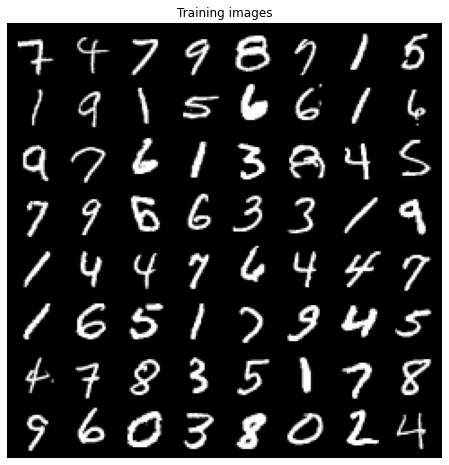

In [7]:
# For loading the data in batches using DataLoader (also motivated as per [2])
# All training images will be resized to this dimension, Here in MNIST, 
# images are (28 x 28) in spatial dimensions
batch_size = 128 
image_size = 28 

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

real_batch = next(iter(train_loader))
plt.figure(figsize=(8, 8)) # As the training images are of size (28 x 28)
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], 
                                         padding=2, normalize=True).cpu(), (1,2,0)))

In [8]:
# Check spatial dimensions of a batch of training samples and 
# some basic statistics like mean, minimum and maximum value

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
print(example_data.dtype)
print(example_data.min())
print(example_data.mean())
print(example_data.max())

torch.Size([128, 1, 28, 28])
torch.float32
tensor(-1.)
tensor(-0.7395)
tensor(1.)


### Define the Network parameters and Optimizer parameters


In [9]:
############################################################################################
# Network Parameters
############################################################################################

nc = 1 # No. of color channels used in the training image
ngf = 64 # Depth of feature maps carried forward in generator network
ndf = 16 # Depth of feature maps carried forward in discriminator network
nz = 64 # Size of the generator latent variable ('Flattened' dimension size) 

## **Building the Generator and Discriminator networks for DCGAN**

Implementation of the Generator and Discriminator of the DCGAN. In this case we will be implementing the DCGAN architecture, which consists of using a specific random initialisation of weights, followed by defining the convolutional neural networks for the Generator function and the Discriminator function. An example of how a Generator network would look like is provided as a block diagram in [2].

### Defining a function for weight initialisation for the generator and discriminator networks. 

As per the paper on DCGAN [2], the weights shall be initialised as normally distributed with parameters: mean=0, stdev=0.02. 

#### **Task:**
Use `nn.init` and the `normal_` function there to initialise layer weights of the convolutional layers using normallly distributed values


In [10]:
#def weights_init(m):
#    '''
#    This function takes in a module 'm' as an input and initialises the 
#    weights of the module. In this case, the modules are mostlly convolutional
#    layers
#    '''
#    classname = m.__class__.__name__
#    if classname.find('Conv') != -1:
        ### ... Insert code here

In [11]:
# Solution
def weights_init(m):
  """ 
  This function takes in a module 'm' as an input and initialises the 
  weights of the module. In this case, the modules are mostlly convolutional
  layers 
  """
  classname = m.__class__.__name__
  if classname.find('Conv') != -1:
    nn.init.normal_(m.weight, 0.0, 0.02)

### Setting up the Generator network for the DCGAN:

The Generator Network $G\left(z\right)$ is designed to map the latent space vector $(z)$ to the data-space. 

By doing so, the intention should be produce data samples that are designed to confuse the Discriminator Network. 

Additionally, a Generator network uses strided convolutions, each paired with a Batch-Normalization layer and a ReLU activation. The generator output is passed through a *tanh* function to return it in the range $\left[-1, 1\right]$. 

For a guide on how to use ConvTranspose2D (which is basically the opposite operation of Conv2D): https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html#torch.nn.ConvTranspose2d

For a guide on how to use BatchNorm: 
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d


In [12]:
# Defining a function for creating basic blocks for the Generator Network

def create_Gen_block_basic(n_in, n_out, kernel_size, stride, padding, bias=False):
    """ 
    Creating a basic block for the DCGAN generator network.
    A basic block for the DCGAN generator consists of three layers one after the 
    other in a sequential manner (achieved using nn.Sequential()). Those three layers
    are: 
      - A Transposed Convolutional layer (can be thought of as an inverse of the convolution operation)
      - A Batch normalization layer 
      - A ReLU activation function

    Args:
    - n_in: No. of input channels
    - n_out: No. of output channels
    - kernel_size: Kernel size of the filter / kernel used for convolution
    - stride: No. of pixels by which the kernel is to be shifted
    - padding: Padding to be added to the input before convolution
    - bias: Flag to decide whether to include bias in the convolution layer
    """
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels=n_in, out_channels=n_out, kernel_size=kernel_size,
                           stride=stride, padding=padding, bias=False),
        nn.BatchNorm2d(num_features=n_out),
        nn.ReLU(inplace=True)
    )

# Defining a function the last block for the Generator Network

def create_Gen_block_last(n_in, n_out, kernel_size, stride, padding, bias=False):
    """ 
    Creating the last block for the DCGAN generator network.
    The last block for the DCGAN generator consists of two layers one after the 
    other in a sequential manner (achieved using nn.Sequential()). Those two layers
    are: 
      - A Transposed Convolutional layer (can be thought of as an inverse of the convolution operation)
      - A tanh activation function
      
    Args:
    - n_in: No. of input channels
    - n_out: No. of output channels
    - kernel_size: Kernel size of the filter / kernel used for convolution
    - stride: No. of pixels by which the kernel is to be shifted
    - padding: Padding to be added to the input before convolution
    - bias: Flag to decide whether to include bias in the convolution layer
    """
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels=n_in, out_channels=n_out, kernel_size=kernel_size,
                           stride=stride, padding=padding, bias=False),
        nn.Tanh()
    )

In [13]:
class Gen_network(nn.Module):
    """
    This function utilizes the basic block building functions defined as above
    and builds the total network by sequentially stacking up the blocks 
    using nn.Sequential(). The values passsed to the individual block creating 
    functions are decided based on the input to that block and the expected shape of the 
    output (also mentioned as 'Output size')
    ----
    Args:
      - nz: Size of the hidden layer
      - ngf: Depth of feature maps carried forward in generator network
      - nc: Number of channels expected in the output
      - ngpu: Number of gpu threads available for use, usually set this to 1

    Methods:
      - __init__(): Initializes the network 
      - forward(): Performs a simple forward pass through the network
    """
    def __init__(self, nz=64, ngf=64, nc=1, ngpu=1):
        super(Gen_network, self).__init__()
        
        self.ngpu = ngpu # No. of GPU threads available for use
        
        self.main = nn.Sequential()
        
        # Input is Z (tensor of shape (batch size x nz x 1 x 1)) and will be transformed 
        # into a convolution
        self.main.add_module('genblock1', create_Gen_block_basic(n_in=nz, n_out=ngf*4, kernel_size=3,
                                                    stride=2, padding=0, bias=False))

         # State size. (ngf * 4) x 3 x 3 (i.e. num_channels = ngf*4, kernel_size = (3, 3))
        self.main.add_module('genblock2', create_Gen_block_basic(n_in=ngf*4, n_out=ngf*2, kernel_size=4,
                                                    stride=1, padding=0, bias=False))
        
        # State size. (ngf * 2) x 6 x 6 (i.e. num_channels = ngf*2, kernel_size = (6, 6))
        self.main.add_module('genblock3', create_Gen_block_basic(n_in=ngf*2, n_out=ngf, kernel_size=3,
                                                    stride=2, padding=0, bias=False))
        
        # State size. (ngf) x 13 x 13 (i.e. num_channels = ngf, kernel_size = (13, 13))
        self.main.add_module('genblock_last', create_Gen_block_last(n_in=ngf, n_out=nc, kernel_size=4,
                                                    stride=2, padding=0, bias=False))
        # State size. (nc) x 28 x 28
  
    def forward(self, input):
        return self.main(input) # Returns the output of the generator network

### Setting up the Discriminator Network for the DCGAN: 
The Discriminator Function $D\left(x\right)$ is a binary classification network that takes an image as an input and outputs a scalar probability that the input image is real (as opposed to fake). 

Here, $D\left(x\right)$ takes a nc x 64 x 64 image as an input and processes it through a series of Conv2D layers (as opposed to ConvTransposed2D layers in case of $G\left(z\right)$.

**Task**: 
- Similar to the generator network, complete the code for creating basic blocks of the discriminator network. 
- The last block of the Discriminator network is to contain **no batch normalization** and should use a **sigmoid** activation. Use `nn.Sequential( )` in the similar way as in `create_Disc_block_basic( )` and `create_Disc_block_last( )`
- Also, there are Batch Normalization and LeakyReLU (with a slope of 0.2) layers applied afeter every Conv2D layer as in previous case. So each Disc. block consists of Conv2D, Batchnorm, LeakyReLU layers

In [14]:
# Defining a function for creating basic blocks for the Discriminator Network

def create_Disc_block_basic(n_in, n_out, kernel_size, stride, padding, bias=False):
    """ 
    Creating a basic block for the DCGAN discriminator network.
    A basic block for the DCGAN discriminator consists of three layers one after the 
    other in a sequential manner (achieved using nn.Sequential()). Those three layers
    are: 
      - A Convolutional layer 
      - A Batch normalization layer 
      - A LeakyReLU activation function

    Args:
    - n_in: No. of input channels
    - n_out: No. of output channels
    - kernel_size: Kernel size of the filter / kernel used for convolution
    - stride: No. of pixels by which the kernel is to be shifted
    - padding: Padding to be added to the input before convolution
    - bias: Flag to decide whether to include bias in the convolution layer
    """
    return nn.Sequential(
        nn.Conv2d(in_channels=n_in, out_channels=n_out, kernel_size=kernel_size,
                           stride=stride, padding=padding, bias=False),
        nn.BatchNorm2d(num_features=n_out),
        nn.LeakyReLU(0.2, inplace=True)
    )

# Defining a function the last block for the Discriminator Network

def create_Disc_block_last(n_in, n_out, kernel_size, stride, padding, bias=False):
    """
    Creating the last block for the DCGAN discriminator network.
    The last block for the DCGAN discriminator consists of two layers one after the 
    other in a sequential manner (achieved using nn.Sequential()). Those two layers
    are: 
      - A Convolutional layer (can be thought of as an inverse of the convolution operation)
      - A sigmoid activation function
      
    Args:
    - n_in: No. of input channels
    - n_out: No. of output channels
    - kernel_size: Kernel size of the filter / kernel used for convolution
    - stride: No. of pixels by which the kernel is to be shifted
    - padding: Padding to be added to the input before convolution
    - bias: Flag to decide whether to include bias in the convolution layer
    """
    return nn.Sequential(
        nn.Conv2d(in_channels=n_in, out_channels=n_out, kernel_size=kernel_size,
                           stride=stride, padding=padding, bias=False),
        nn.Sigmoid()
    )

**Task**: Now using the functions for creating the basic blocks, create the Discriminator network in the similar manner as the Generator network. Pay attention to input and output dimensions

In [15]:
class Discr_network(nn.Module):
    """
    This function utilizes the basic block building functions defined as above
    and builds the total discriminator network by sequentially stacking up the blocks 
    using nn.Sequential(). The values passsed to the individual block creating 
    functions are decided based on the input to that block and the expected shape of the 
    output (also mentioned as 'Output size')
    ----
    Args:
      - nz: Size of the hidden layer
      - ndf: Depth of feature maps carried forward in discriminator network 
      - nc: Number of channels expected in the output
      - ngpu: Number of gpu threads available for use, usually set this to 1

    Methods:
      - __init__(): Initializes the network 
      - forward(): Performs a simple forward pass through the network
    """
    def __init__(self, ndf=16, nc=1, ngpu=1):
        super(Discr_network, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential()
        
        # Input is a tensor of dimension (batch_size x nc x 28 x 28)
        self.main.add_module('discblock1', create_Disc_block_basic(n_in=nc, n_out=ndf, kernel_size=4,
                                                     stride=2, padding=0, bias=False))
        
        ##########################################################################
        # Fill in the dimensions for the kernel_size, stride and padding parameter
        # s.t. the spatial dimensions are 5 x 5, and the number of output 
        # channels is ndf * 2
        ##########################################################################
        self.main.add_module('discblock2', create_Disc_block_basic(n_in=ndf, n_out=ndf*2, kernel_size=4,
                                                     stride=2, padding=0, bias=False))
        
        ##########################################################################
        # Fill in the dimensions for the kernel_size, stride and padding parameter
        # s.t. the spatial dimensions are 1 x 1, and the number of output 
        # channels is 1 (as the output is a single tensor)
        ##########################################################################
        self.main.add_module('discblock_last', create_Disc_block_last(n_in=ndf*2, n_out=1, kernel_size=4,
                                                     stride=2, padding=0, bias=False))
        

    def forward(self, input):
        return self.main(input)

Create the Generator and Discriminator Network and initialize the weights

In [16]:
G_net = Gen_network(nz, ngf, nc, ngpu).to(device)

# Apply the weights_init function to randomly initialise all the weights 
# to mean = 0 and stddev = 0.02
G_net.apply(weights_init)

# Pushing the model to the GPU
if (device.type == 'cuda') and (ngpu > 1):
    G_net = nn.DataParallel(G_net, list(range(ngpu)))
elif (device.type == 'cuda') and (ngpu == 1):
    G_net.cuda()

# Print the Model
print(G_net)

Gen_network(
  (main): Sequential(
    (genblock1): Sequential(
      (0): ConvTranspose2d(64, 256, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (genblock2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (genblock3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (genblock_last): Sequential(
      (0): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
      (1): Tanh()
    )
  )
)


In [17]:
D_net = Discr_network(ndf=ndf, nc=nc, ngpu=ngpu)

# Apply the weights_init function to randomly initialise all the weights 
# to mean = 0 and stddev = 0.02
D_net.apply(weights_init)

if (device.type == 'cuda') and (ngpu > 1):
    D_net = nn.DataParallel(D_net, list(range(ngpu)))
elif (device.type == 'cuda') and (ngpu == 1):
    D_net.cuda()

# Print the Model
print(D_net)

Discr_network(
  (main): Sequential(
    (discblock1): Sequential(
      (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (discblock2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (discblock_last): Sequential(
      (0): Conv2d(32, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
      (1): Sigmoid()
    )
  )
)


### Set up loss function and optimizers for Discriminator and Generator

The choces for most training parameters such as the type of Optimizer used, learning rate, momentum are as per the recommendations in [2]. It was found that using *Adam* as an optimizer, a low learning rate as 0.0002 and a slightly less momentum value such as 0.5 helped to deal with instability problems in training. The loss function used is a binary Cross Entropy loss

In [18]:
# Initialise Binary Cross Entropy Loss to be used for the Discriminator function
criterion = nn.BCELoss()

# Optimizer Parameters
lr = 0.0002 # Learning rate of the optimizer (Recommended learning rate as per [2])
beta1 = 0.5 # Hyperparametr of for Adam optimizer (Recommended Momentum value as per [2])
ngpu = 1 # Number of GPUs available for training. 

# Create a batch of latent vectors that will be used as input to the generator network 
# This set of vectors will be used to save some outputs for visualising the quality of the
# generated samples later on in an 8 x 8 grid
fixed_noise = Variable(torch.randn(64, nz, 1, 1, device=device), requires_grad=False)
print(fixed_noise.dtype)

# Establish labels for 'Real' and 'Fake' (Generated) data during training
real_label = 1.0
fake_label = 0.0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(D_net.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(G_net.parameters(), lr=lr, betas=(beta1, 0.999))

torch.float32


## **Building the training loop**

**Task:** Complete the code for the associated update functions by filling in the remaining areas

In [19]:
def update_D_net(data, D_net, G_net, optimizer_D, real_label, fake_label, criterion, device):
    '''
    Update D network: maximize 0.5 * (log(D(x)) + log(D(G(z)))) wrt parameters of D_net
    NOTE: This is no longer a zero-sum game.
    
    - data: A batch of real data as input. Consists of (inputs, labels) in a batch-size
    - D_net: The discriminator network
    - G_net: The generator network
    - optmizer_D: The optimizer for the discriminative network
    - real_label: The real label for the output of the discriminative network (usually this is 1.0)
    - fake_label: The fake label for the output of the discriminative network (usually this is 0.0)
    - criterion: The binary cross entropy loss function used for formulating 0.5 * (log(D(x)) + log(D(G(z))))
    - device: The device to push networks, tensors (cpu/cuda (gpu))
    '''
    
    ##############################################################
    ## Train with all-'real' batch (finding log(D(x)))
    ##############################################################
    
    D_net.zero_grad()
    # Format batch
    real = data[0].to(device)
    b_size = real.size(0)
    label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
    # Forward pass real batch through D
    output = D_net(real).view(-1)
    # Calculate loss on all-real batch
    errD_real = criterion(output, label)
    # Calculate gradients for D in backward pass
    errD_real.backward(retain_graph=True)
    D_x = output.mean().item()

    ##############################################################
    ## Train with all-'fake' batch log(D(G(z)))
    ##############################################################
    
    # Generate batch of latent vectors
    noise = torch.randn(b_size, nz, 1, 1, device=device)
    # Generate fake image batch with G
    fake = G_net(noise)
    label.fill_(fake_label)
    # Classify all fake batch with D
    output = D_net(fake.detach()).view(-1)
    # Calculate D's loss on the all-fake batch
    errD_fake = criterion(output, label)
    # Calculate the gradients for this batch
    errD_fake.backward(retain_graph=True)
    D_G_z1 = output.mean().item() # Output 'before' an update of the discriminator
    
    ##############################################################
    # Add the average of the gradients from the all-real and all-fake batches
    # to compute the error for the Disc. network
    ##############################################################
    errD = (errD_real + errD_fake)*0.5

    # Update the Disc. network
    optimizerD.step()

    return D_x,  D_G_z1, errD, D_net, fake

def update_G_net(data, fake, D_net, G_net, optimizer_G, real_label, criterion, device):
    '''
    Update G network: maximize log(D(G(z)))) wrt to parameters of G_net
    NOTE: This is no longer a zero-sum game.
    
    - data: A batch of real data as input. Consists of (inputs, labels) in a batch-size
    - fake: A batch of fake data generated from noisy input and G_net
    - D_net: The discriminator network
    - G_net: The generator network
    - optmizer_G: The optimizer for the discriminative network
    - real_label: The real label for the output of the discriminative network (usually this is 1.0)
    - criterion: The binary cross entropy loss function used for formulating 0.5 * (log(D(x)) + log(D(G(z))))
    - device: The device to push networks, tensors (cpu/cuda (gpu))
    '''
    ##################################################################
    # (2) Update G network: maximize log(D(G(z)))
    ##################################################################
    
    real = data[0].to(device)
    b_size = real.size(0)
    label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

    G_net.zero_grad()
    #label.fill_(real_label)  # fake labels are real for generator cost
    # Since we just updated D, perform another forward pass of all-fake batch through D
    output = D_net(fake).view(-1)
    # Calculate G's loss based on this output
    errG = criterion(output, label)
    # Calculate gradients for G
    errG.backward(retain_graph=True)
    D_G_z2 = output.mean().item() # Output 'after' an update of the discriminator
    
    # Update the Gen. network
    optimizerG.step()

    return D_G_z2, errG, D_net, G_net


**Task:** Complete the code for the training loop by filling in the remaining areas

In [20]:
# Training Loop
num_epochs = 20 # No. of training epochs

def train_GAN(D_net, G_net, train_loader, optimizer_D, optimizer_G, criterion, 
              device, real_label=1.0, fake_label=0.0, num_epochs=20, fixed_noise=None):
    
    # Lists to keep track of the training progress
    img_list = []
    G_losses = []
    D_losses = []
    D_x_values = []
    D_Gz_values = []
    iters = 0
    
    print("Starting Training Loop...")
    # For each epoch
    for epoch in range(num_epochs):
        # For each batch in the dataloader
        for i, data in enumerate(train_loader, 0):

            ################################################################
            # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
            ###############################################################
            
            D_x, D_G_z1, errD, D_net, fake = update_D_net(data=data,
                                                          D_net=D_net,
                                                          G_net=G_net,
                                                          optimizer_D=optimizerD,
                                                          real_label=real_label,
                                                          fake_label=fake_label,
                                                          criterion=criterion,
                                                          device=device)

            ##################################################################
            # (2) Update G network: maximize log(D(G(z)))
            ##################################################################

            D_G_z2, errG, D_net, G_net = update_G_net(data=data, fake=fake,
                                                D_net=D_net, G_net=G_net,
                                                optimizer_G=optimizerG, 
                                                real_label=real_label, 
                                                criterion=criterion,
                                                device=device)
            
            # Output training stats: D_x reflects the discriminator output after passing in 
            # the real input, D_G_z1 represents the discriminator output after passing in the
            # generated output BEFORE update of discriminator, whereas D_G_z2 represents the 
            # discriminator output after passing in the generated output AFTER
            # update of discriminator
            if i % 400 == 0:
                print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                      % (epoch, num_epochs, i, len(train_loader),
                        errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            # Save Losses for plotting later
            G_losses.append(errG.item())
            D_losses.append(errD.item())
            D_x_values.append(D_x)
            D_Gz_values.append(D_G_z2)

            # Check how the generator is doing by saving G's output on fixed_noise
            if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader)-1)):
                with torch.no_grad():
                    fake = G_net(fixed_noise).detach().cpu()
                img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

            iters += 1
      

    return D_net, G_net, D_losses, G_losses, D_x_values, D_Gz_values, img_list

In [21]:
D_net, G_net, D_losses, G_losses, D_x_values, D_Gz_values, img_list = train_GAN(D_net,
                                                                                G_net, 
                                                                                train_loader,
                                                                                optimizerD,
                                                                                optimizerG,
                                                                                criterion,
                                                                                device,
                                                                                real_label,
                                                                                fake_label,
                                                                                num_epochs,
                                                                                fixed_noise)

Starting Training Loop...
[0/20][0/469]	Loss_D: 0.7437	Loss_G: 0.7819	D(x): 0.4413	D(G(z)): 0.4790 / 0.4631
[0/20][400/469]	Loss_D: 0.7509	Loss_G: 0.7625	D(x): 0.4308	D(G(z)): 0.4820 / 0.4665
[1/20][0/469]	Loss_D: 0.6603	Loss_G: 0.8187	D(x): 0.4923	D(G(z)): 0.4567 / 0.4410
[1/20][400/469]	Loss_D: 0.6190	Loss_G: 0.9363	D(x): 0.4945	D(G(z)): 0.4092 / 0.3922
[2/20][0/469]	Loss_D: 0.7068	Loss_G: 0.7083	D(x): 0.5085	D(G(z)): 0.5192 / 0.4925
[2/20][400/469]	Loss_D: 0.4561	Loss_G: 1.0988	D(x): 0.6688	D(G(z)): 0.3865 / 0.3434
[3/20][0/469]	Loss_D: 0.5952	Loss_G: 0.9635	D(x): 0.5694	D(G(z)): 0.4578 / 0.3865
[3/20][400/469]	Loss_D: 0.4962	Loss_G: 1.4481	D(x): 0.6595	D(G(z)): 0.4285 / 0.2411
[4/20][0/469]	Loss_D: 0.6576	Loss_G: 0.7770	D(x): 0.5549	D(G(z)): 0.5084 / 0.4621
[4/20][400/469]	Loss_D: 0.5428	Loss_G: 1.0517	D(x): 0.6071	D(G(z)): 0.4236 / 0.3564
[5/20][0/469]	Loss_D: 0.5897	Loss_G: 1.0192	D(x): 0.5136	D(G(z)): 0.3770 / 0.3648
[5/20][400/469]	Loss_D: 0.5370	Loss_G: 1.0070	D(x): 0.6301	D(G

Plotting the losses for the generator and the discriminator network (usually a bit noisy)

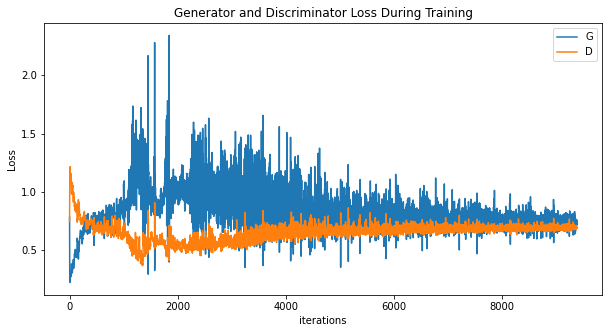

In [22]:
# Plotting the losses for the network

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the values of $D(x)$ and $D(G(z))$ for the network. 

Could you understand why the graph looks the way it is? (*Think*)

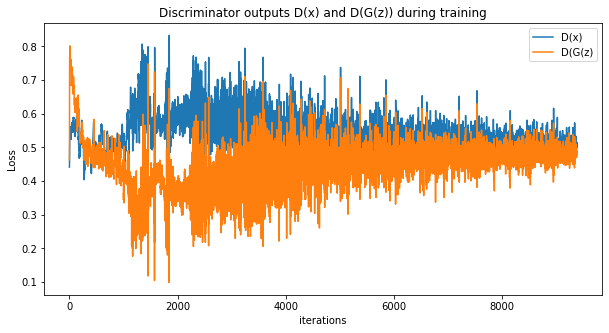

In [23]:
# Plotting the values of D(x) and D(G(z)) for the network

plt.figure(figsize=(10,5))
plt.title("Discriminator outputs D(x) and D(G(z)) during training")
plt.plot(D_x_values,label="D(x)")
plt.plot(D_Gz_values,label="D(G(z)")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

This animation shows how the generator network produces 'fake' images to confuse the discriminator network

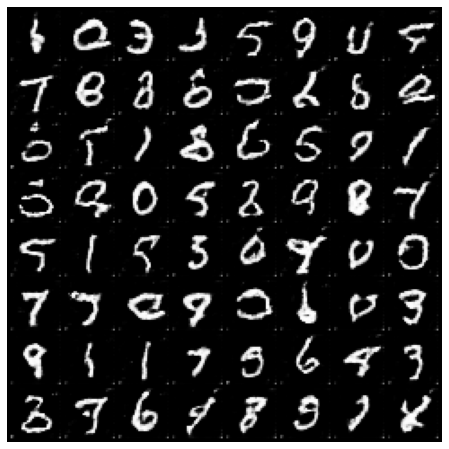

In [24]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

## **Examining the quality of reconstructions: Looking at some Real Images vs. Fake Images**

For the fake images, they don't necessarily correspond to be the exact same digits, rather here the aim is to try to visualise the quality of the fake images that the network uses

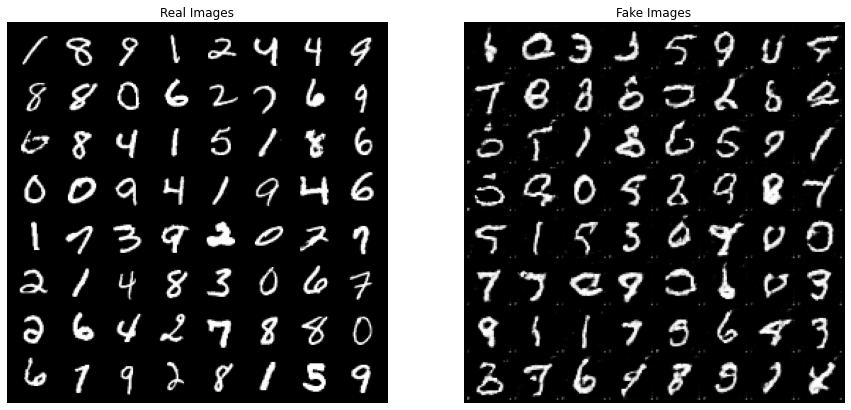

In [25]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(test_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], 
                                         padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

## Interpolating latent space

**Task:** In this final task, you generate some interpolated latent space images. For this, you need to generate 2 samples of input noises. Then you need to interpolate them linearly using a parameter $\rho$ between 0 and 1 and pass the result through the generator network. 

But in order to observe a smooth transition like grid, we generate an array of parameters and then generate a grid of images, one for each $\rho$. 

In [26]:
test_fixed_noise = Variable(torch.randn(2, nz, 1, 1, device=device), requires_grad=False)
print(test_fixed_noise.dtype)

def interpolate_points(z1, z2, n_steps=10):
    '''
    Compute the interpolated latent data point using z1 and z2, with rho
    varying from [0, 1] with `n_steps` values of rho. Returns a list of 
    `n_steps` number of latent data points. 
    '''
    rho_vec = torch.linspace(start=0, end=1, steps=n_steps)
    latent_vecs = []
    for rho in rho_vec:
        interpolated_z = rho * z1 + (1 - rho) * z2
        latent_vecs.append(interpolated_z)
      
    return latent_vecs

def get_interpolated_images(G_net, nz, n_steps=10):
    '''
    Compute the interpolated image corresponding to the latent data point 
    using z1 and z2, with rho varying from [0, 1] with `n_steps` values of rho. 
    Returns a list of `n_steps` number of latent data points. 
    '''
    test_fixed_noise = Variable(torch.randn(2, nz, 1, 1, device=device), requires_grad=False)
    z1 = test_fixed_noise[0]
    z2 = test_fixed_noise[1]
    interpolated_z_vecs = interpolate_points(z1, z2, n_steps=n_steps)
    image_vecs = []

    G_net.eval()
    with torch.no_grad():
        for interpolated_z in interpolated_z_vecs:
            interpolated_x = G_net(interpolated_z.view(-1, nz, 1, 1))
            image_vecs.append(interpolated_x.squeeze(1).squeeze(0).cpu().numpy())
    
    return image_vecs

def plot_generated(examples, n):
    '''
    Create a plot of generated images using interpolated examples
    '''
    # plot images
    plt.figure(figsize=(15,15))
    for i in range(n):
        # define subplot
        plt.subplot(1, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i], cmap='gray')
    plt.show()

torch.float32


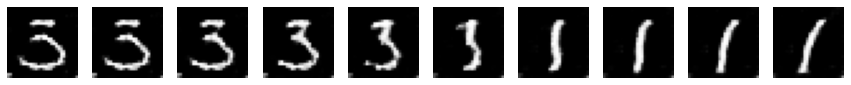

In [42]:
# Examine the interpolated images. You can even try to repeat the following 
# two lines to get multiple grid of images
num_rows = 1

for _ in range(num_rows):
    image_vecs = get_interpolated_images(G_net=G_net, nz=nz, n_steps=10)
    plot_generated(examples=image_vecs, n=len(image_vecs))

## Additional tasks: 

Observe the progression of the training and monitor the losses. Do they eventually settle (a bit noisy) around some values ? If they don't, what is such a phenomenon called while training GANs?

Write your answer in this Markdown cell